# Preprocessing and EDA of Zomato Dataset

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

## Reading CSV

In [2]:
df=pd.read_csv('zomato.csv')

In [3]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df.shape

(51717, 17)

In [5]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [6]:
df=df.drop(['url','address','phone','menu_item','reviews_list'],axis=1)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   dish_liked                   23639 non-null  object
 8   cuisines                     51672 non-null  object
 9   approx_cost(for two people)  51371 non-null  object
 10  listed_in(type)              51717 non-null  object
 11  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(11)
memory usage: 4.7+ MB


## Dropping Duplicates

In [8]:
df.drop_duplicates(inplace=True)
df.shape

(51609, 12)

## Cleaning Rate Column

In [9]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

## Removing 'NEW','-' and '/5' from RAte Column

In [10]:
def handlerate(value):
    if(value=='NEW' or value =='-'):
        return np.nan
    else:
        value = str(value).split('/')
        value = value[0]
        return float(value)
df['rate']=df['rate'].apply(handlerate)
df['rate'].head()
df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [11]:
df.rate.isnull().sum()

10019

## Filling Null Vaues in Rate Column with Mean

In [12]:
df['rate'].fillna(df['rate'].mean(),inplace=True)
df['rate'].isnull().sum()

0

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51609 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51609 non-null  object 
 1   online_order                 51609 non-null  object 
 2   book_table                   51609 non-null  object 
 3   rate                         51609 non-null  float64
 4   votes                        51609 non-null  int64  
 5   location                     51588 non-null  object 
 6   rest_type                    51382 non-null  object 
 7   dish_liked                   23595 non-null  object 
 8   cuisines                     51564 non-null  object 
 9   approx_cost(for two people)  51265 non-null  object 
 10  listed_in(type)              51609 non-null  object 
 11  listed_in(city)              51609 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 5.1+ MB


## Dropping Null Values

In [14]:
df.dropna(inplace = True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari


## Renaming the column for better understanding

In [15]:
df.rename(columns={'approx_cost(for two people)':'cost2plates', 'listed_in(type)':'Type'}, inplace=True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost2plates,Type,listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari


In [16]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Jayanagar', 'Kumaraswamy Layout',
       'Rajarajeshwari Nagar', 'Mysore Road', 'Uttarahalli',
       'South Bangalore', 'Vijay Nagar', 'Bannerghatta Road', 'JP Nagar',
       'BTM', 'Wilson Garden', 'Koramangala 5th Block', 'Shanti Nagar',
       'Richmond Road', 'City Market', 'Bellandur', 'Sarjapur Road',
       'Marathahalli', 'HSR', 'Old Airport Road', 'Indiranagar',
       'Koramangala 1st Block', 'East Bangalore', 'MG Road',
       'Brigade Road', 'Lavelle Road', 'Church Street', 'Ulsoor',
       'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road', 'Domlur',
       'Koramangala 8th Block', 'Frazer Town', 'Ejipura', 'Vasanth Nagar',
       'Jeevan Bhima Nagar', 'Old Madras Road', 'Commercial Street',
       'Koramangala 6th Block', 'Majestic', 'Langford Town',
       'Koramangala 7th Block', 'Brookefield', 'Whitefield',
       'ITPL Main Road, Whitefield', 'Varthur Main Road, Whi

In [17]:
df['listed_in(city)'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

## Listed in(city) and location, both are there, lets keep only one.

In [18]:
df=df.drop(['listed_in(city)'],axis=1)

In [19]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost2plates,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet


In [20]:
df['cost2plates'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '750', '200', '850', '1,200', '150', '350', '250', '1,500',
       '1,300', '1,000', '100', '900', '1,100', '1,600', '950', '230',
       '1,700', '1,400', '1,350', '2,200', '2,000', '1,800', '1,900',
       '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400', '40',
       '1,250', '3,500', '4,000', '2,400', '1,450', '3,200', '6,000',
       '1,050', '4,100', '2,300', '120', '2,600', '5,000', '3,700',
       '1,650', '2,700', '4,500'], dtype=object)

In [21]:
def handlecomma(value):
    value = str(value)
    if ',' in value:
        value = value.replace(',','')
        return float(value)
    else:
        return float(value)
df['cost2plates']=df['cost2plates'].apply(handlecomma)
df['cost2plates'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        750.,  200.,  850., 1200.,  150.,  350.,  250., 1500., 1300.,
       1000.,  100.,  900., 1100., 1600.,  950.,  230., 1700., 1400.,
       1350., 2200., 2000., 1800., 1900.,  180.,  330., 2500., 2100.,
       3000., 2800., 3400.,   40., 1250., 3500., 4000., 2400., 1450.,
       3200., 6000., 1050., 4100., 2300.,  120., 2600., 5000., 3700.,
       1650., 2700., 4500.])

In [22]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost2plates,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet


## Cleaning Rest Type Column

In [23]:
rest_types=df['rest_type'].value_counts(ascending=False)
rest_types

rest_type
Casual Dining                7387
Quick Bites                  5267
Cafe                         2380
Dessert Parlor               1083
Casual Dining, Bar            986
                             ... 
Fine Dining, Microbrewery       5
Club, Casual Dining             4
Dessert Parlor, Kiosk           2
Dhaba                           1
Food Court, Casual Dining       1
Name: count, Length: 73, dtype: int64

In [24]:
rest_types_lessthan1000=rest_types[rest_types<1000]
rest_types_lessthan1000

rest_type
Casual Dining, Bar           986
Delivery                     707
Bar                          358
Bar, Casual Dining           347
Takeaway, Delivery           343
                            ... 
Fine Dining, Microbrewery      5
Club, Casual Dining            4
Dessert Parlor, Kiosk          2
Dhaba                          1
Food Court, Casual Dining      1
Name: count, Length: 69, dtype: int64

## Making Rest Type less than 1000 in frequency as others

In [25]:
def handle_rest_type(value):
    if(value in rest_types_lessthan1000):
        return 'others'
    else:
        return value
df['rest_type']=df['rest_type'].apply(handle_rest_type)
df['rest_type'].value_counts()

rest_type
Casual Dining     7387
others            7276
Quick Bites       5267
Cafe              2380
Dessert Parlor    1083
Name: count, dtype: int64

In [26]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost2plates,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,"Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet


## Cleaning Location Column

In [27]:
location = df['location'].value_counts(ascending=False)
location_lessthan300 = location[location<300]

def handle_location(value):
    if(value in location_lessthan300):
        return 'others'
    else:
        return value
df['location']=df['location'].apply(handle_location)
df['location'].value_counts()

location
others                   3730
Koramangala 5th Block    1799
BTM                      1486
Indiranagar              1365
HSR                      1176
Jayanagar                1077
JP Nagar                 1029
Whitefield                835
Koramangala 7th Block     742
Koramangala 6th Block     726
Marathahalli              680
Koramangala 4th Block     664
MG Road                   601
Brigade Road              567
Church Street             509
Bannerghatta Road         499
Ulsoor                    476
Bellandur                 474
Kalyan Nagar              468
Koramangala 1st Block     467
Sarjapur Road             455
Lavelle Road              441
Residency Road            439
Banashankari              390
Malleshwaram              372
Richmond Road             351
Cunningham Road           332
Electronic City           326
Brookefield               307
New BEL Road              306
St. Marks Road            304
Name: count, dtype: int64

In [28]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost2plates,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,"Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,others,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet


## Cleaning cuisines column

In [29]:
cuisines = df['cuisines'].value_counts(ascending=False)
cuisines_lessthan100=cuisines[cuisines<100]

def handle_cuisines(value):
    if(value in cuisines_lessthan100):
        return 'others'
    else:
        return value
df['cuisines']=df['cuisines'].apply(handle_cuisines)
df['cuisines'].value_counts()

cuisines
others                                              17661
North Indian                                         1160
North Indian, Chinese                                 778
South Indian                                          367
Cafe                                                  285
South Indian, North Indian, Chinese                   233
Bakery, Desserts                                      217
Desserts, Beverages                                   216
Ice Cream, Desserts                                   211
Chinese                                               210
Desserts                                              209
Biryani                                               169
Chinese, Momos                                        162
Finger Food                                           151
Fast Food                                             150
North Indian, Chinese, Biryani                        139
Mithai, Street Food                                   138
North

In [30]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost2plates,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",others,800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",others,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,"Churros, Cannelloni, Minestrone Soup, Hot Choc...",others,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,others,300.0,Buffet
4,Grand Village,No,No,3.8,166,others,Casual Dining,"Panipuri, Gol Gappe",others,600.0,Buffet


In [31]:
df['Type'].value_counts()

Type
Delivery              10694
Dine-out               8082
Desserts               1367
Cafes                  1067
Drinks & nightlife      891
Buffet                  761
Pubs and bars           531
Name: count, dtype: int64

# Data is clean, Let's jump to Visualization

### Count Plot of Various Locations

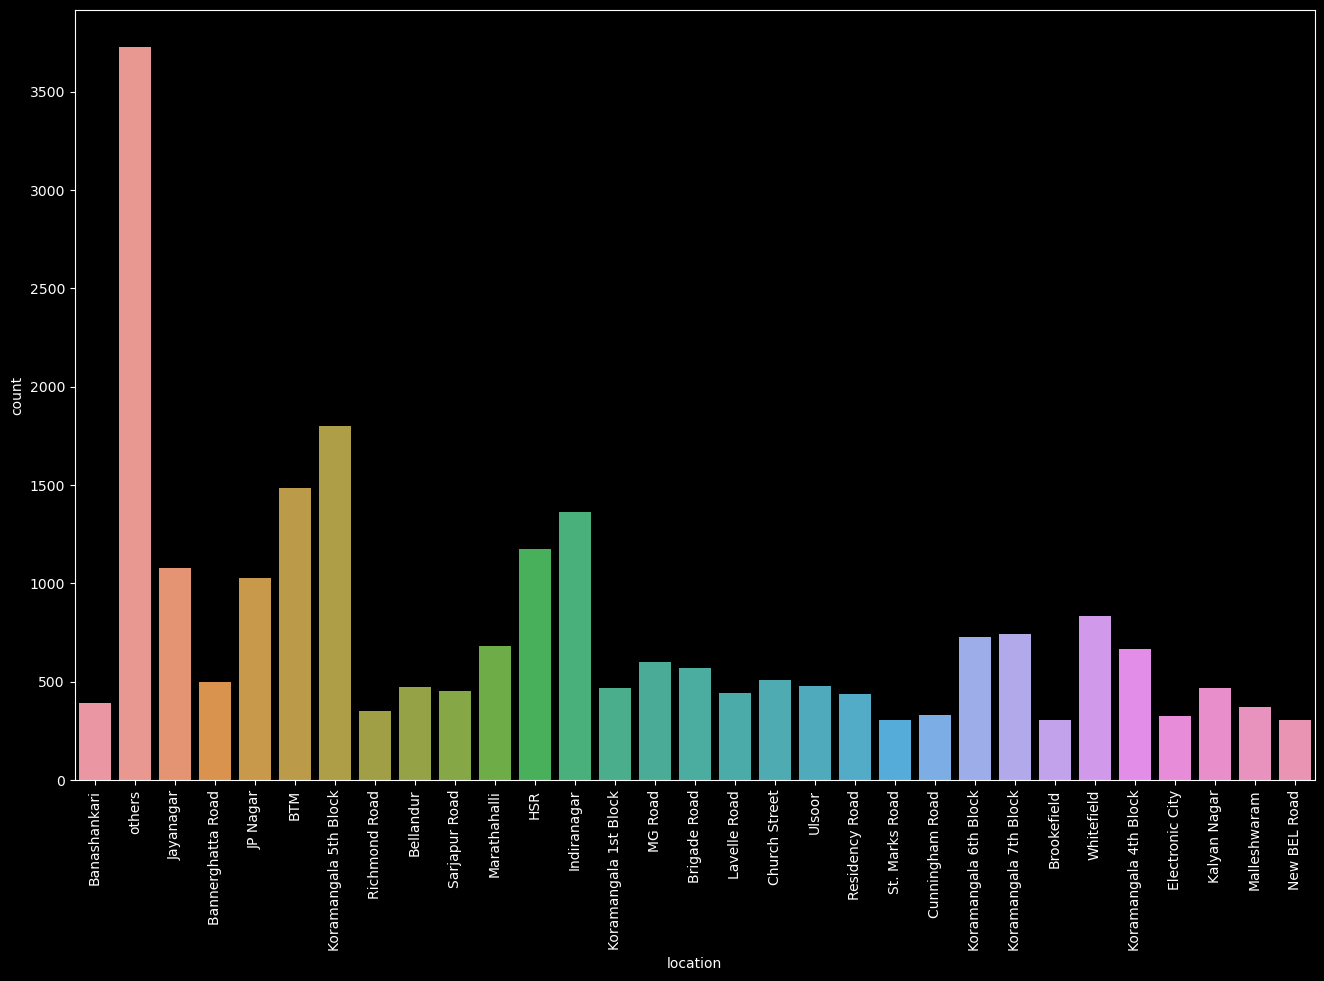

In [32]:
plt.figure(figsize=(16,10))
ax = sns.countplot(x='location', data=df)
plt.xticks(rotation=90)
plt.show()

### Visualizing Online Order

<Axes: xlabel='online_order', ylabel='count'>

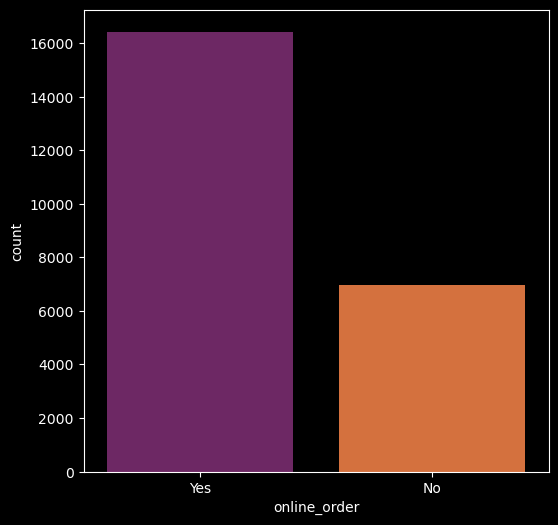

In [33]:
plt.figure(figsize=(6,6))
sns.countplot(x=df['online_order'], palette = 'inferno')

### Visualize the Book Table

<Axes: xlabel='book_table', ylabel='count'>

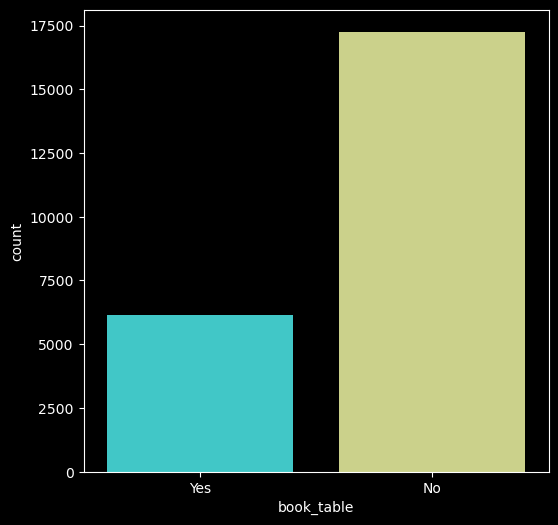

In [34]:
plt.figure(figsize=(6,6))
sns.countplot(x=df['book_table'],palette = 'rainbow')

### Visualizing Online Order Vs Rate

<Axes: xlabel='online_order', ylabel='rate'>

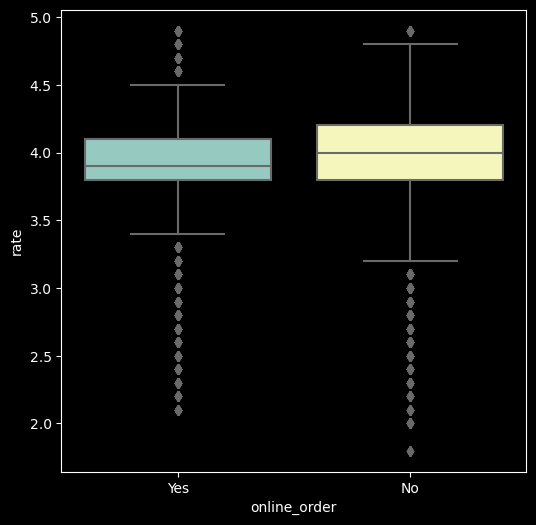

In [35]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=df)

### Visualizing Book Table Vs Rate

<Axes: xlabel='book_table', ylabel='rate'>

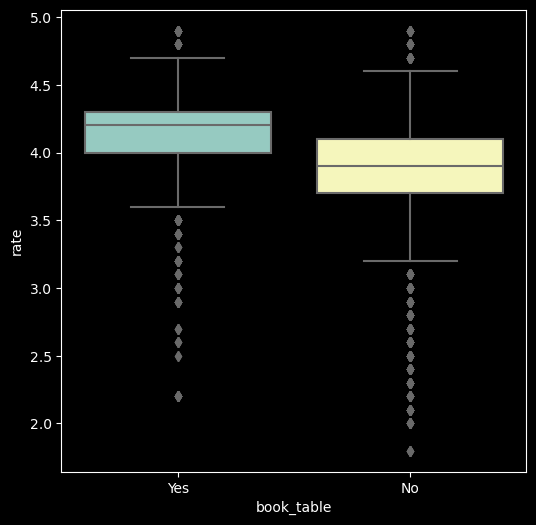

In [36]:
plt.figure(figsize=(6,6))
sns.boxplot(x='book_table', y='rate',data=df)

### Visualizing Online Order Facility, Location Wise

In [37]:
df1=df.groupby(['location', 'online_order'])['name'].count()
df1.to_csv('location_online.csv')
df1=pd.read_csv('location_online.csv')
df1_pivot = pd.pivot_table(df1, 
                           values=None,  # 'value' is not specified, so it defaults to all columns not set as index or columns
                           index=['location'], 
                           columns=['online_order'], 
                           fill_value=0, 
                           aggfunc=np.sum)
df1_pivot

C:\Users\DELL\AppData\Local\Temp\ipykernel_13140\1356028873.py:4: FutureWarning: The provided callable <function sum at 0x0000023A4D9C2A20> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df1_pivot = pd.pivot_table(df1,


name      
online_order             No   Yes
location                         
BTM                     274  1212
Banashankari            103   287
Bannerghatta Road       114   385
Bellandur               118   356
Brigade Road            224   343
Brookefield              61   246
Church Street           195   314
Cunningham Road          62   270
Electronic City          98   228
HSR                     161  1015
Indiranagar             403   962
JP Nagar                315   714
Jayanagar               220   857
Kalyan Nagar            127   341
Koramangala 1st Block    57   410
Koramangala 4th Block   262   402
Koramangala 5th Block   564  1235
Koramangala 6th Block   239   487
Koramangala 7th Block   216   526
Lavelle Road            253   188
MG Road                 327   274
Malleshwaram            132   240
Marathahalli            161   519
New BEL Road             64   242
Residency Road          265   174
Richmond Road           202   149
Sarjapur Road           108   347
St. Marks Road          137   167
Ulsoor                  170   306
Whitefield              267   568
others                 1058  2672

<Axes: >

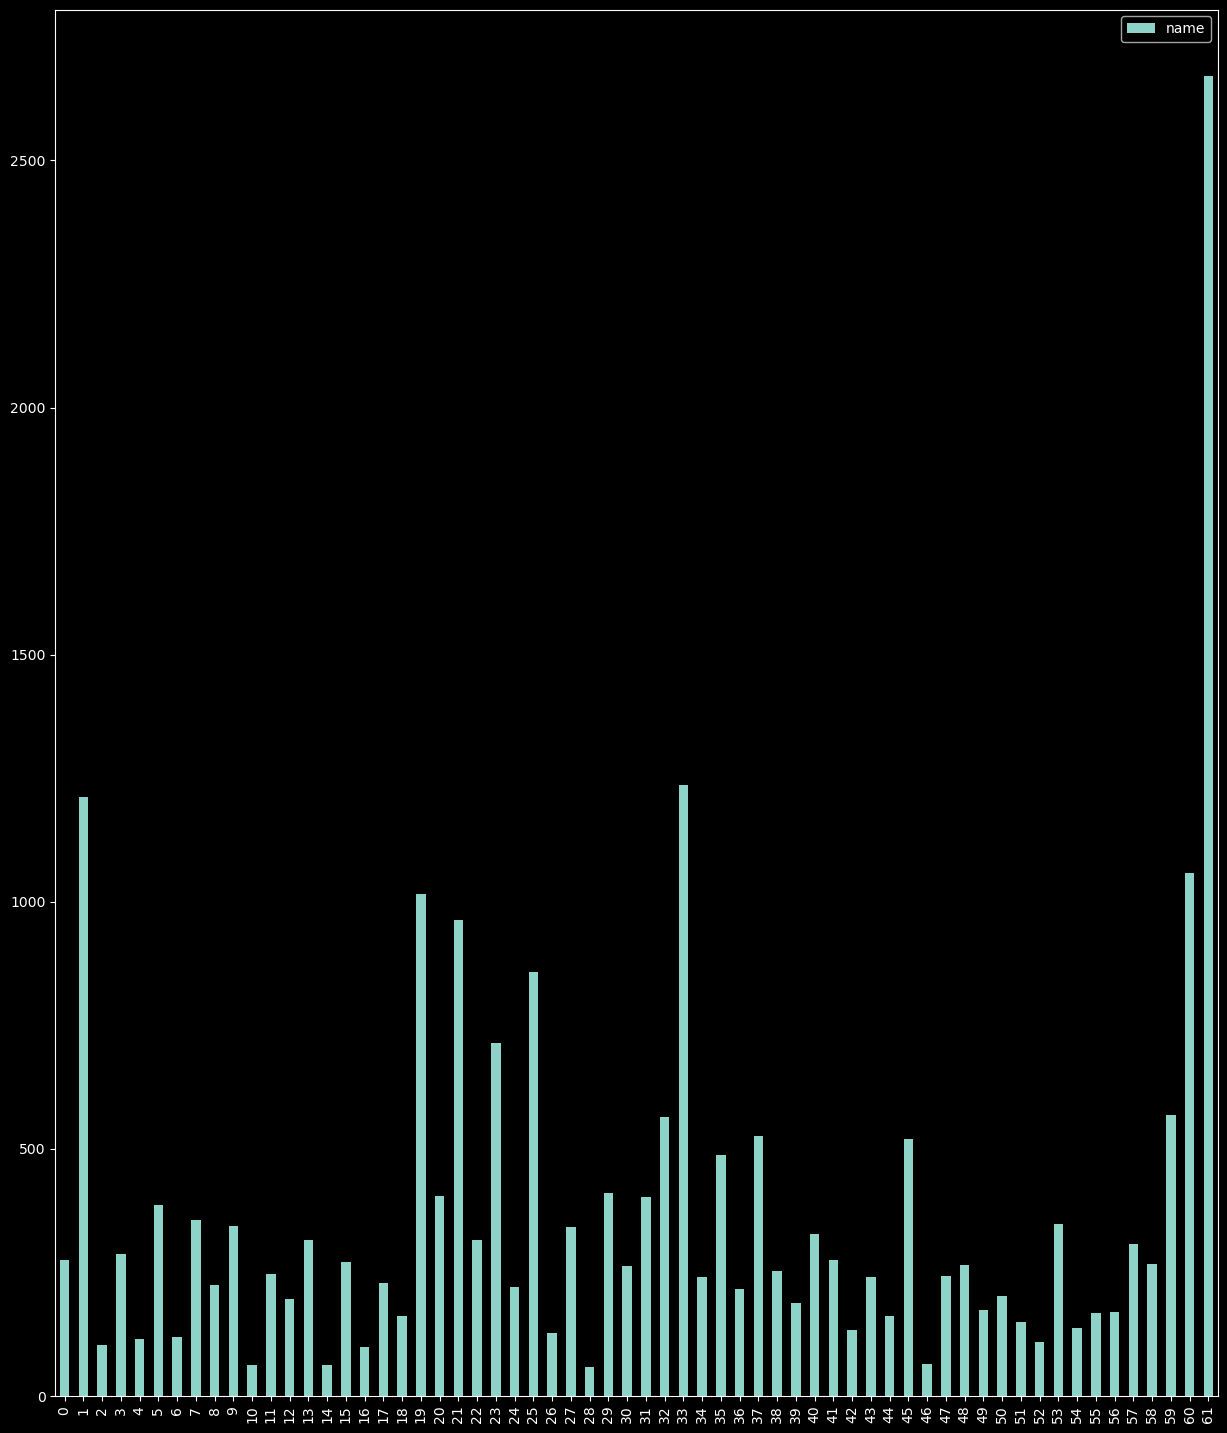

In [38]:
df1.plot(kind='bar',figsize=(15,18))


### Visualize Book Table Facility, Location Wise

In [39]:
df2 = df.groupby(['location', 'book_table'])['name'].count()
df2.to_csv('location_booktable.csv')

# Read the CSV back in
df2 = pd.read_csv('location_booktable.csv')

# Create a pivot table from df2
df2_pivot = pd.pivot_table(df2, 
                           values='name',  # Aggregating the 'name' column
                           index=['location'], 
                           columns=['book_table'], 
                           fill_value=0, 
                           aggfunc='sum')  # Using 'sum' to avoid future warnings

df2_pivot


book_table,No,Yes
location,,
BTM,1348,138
Banashankari,335,55
Bannerghatta Road,408,91
Bellandur,378,96
Brigade Road,399,168
Brookefield,239,68
Church Street,328,181
Cunningham Road,163,169
Electronic City,242,84


<Axes: >

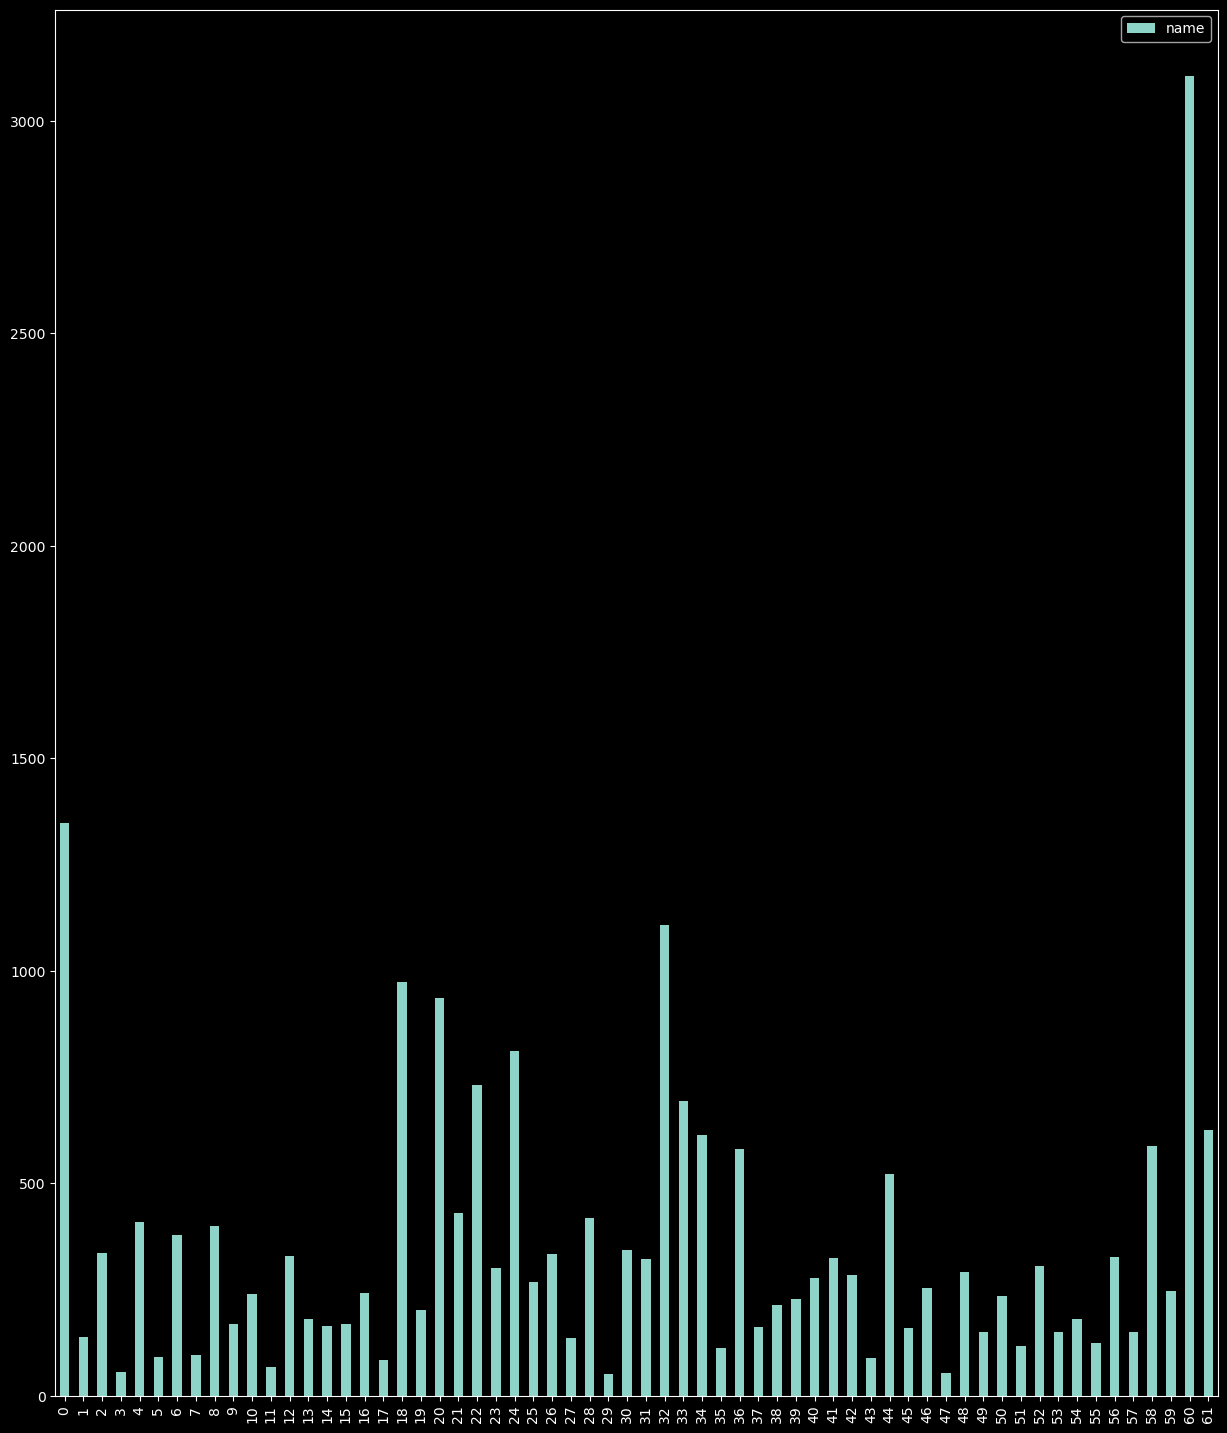

In [40]:
df2.plot(kind='bar',figsize=(15,18))

### Visualizing Types of Restaurant Vs Rate

<Axes: xlabel='Type', ylabel='rate'>

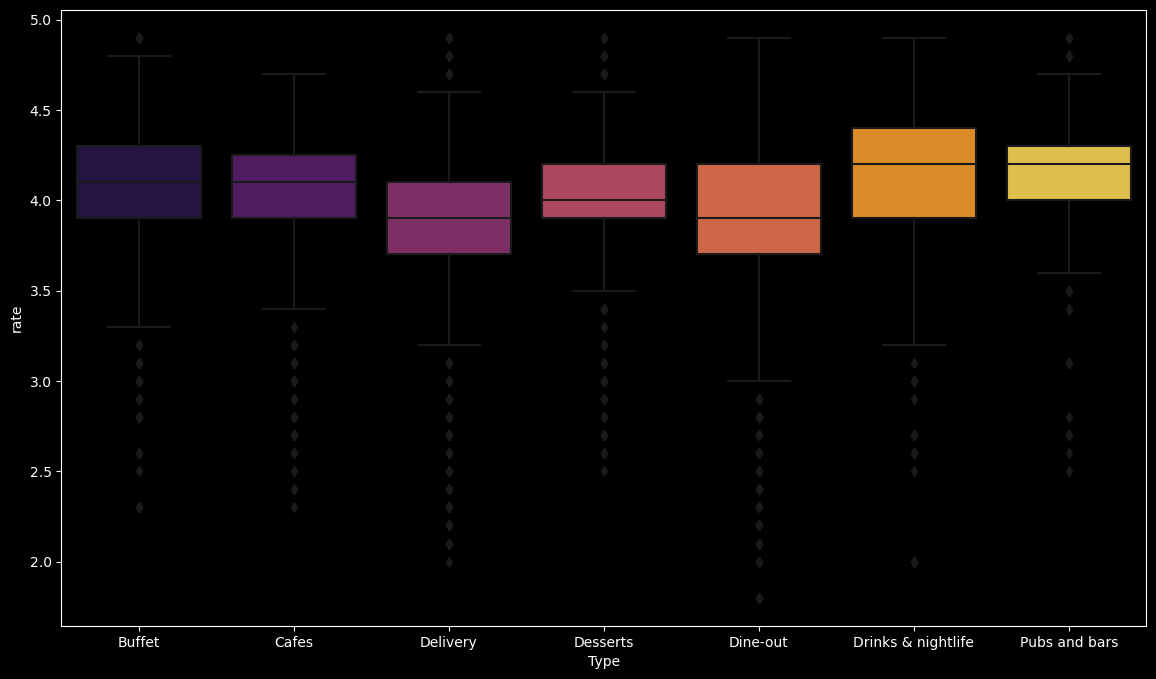

In [41]:
plt.figure(figsize = (14,8))
sns.boxplot(x='Type',y='rate',data=df,palette = 'inferno')

### Grouping Types of Restaurants, location wise

In [42]:
df3 = df.groupby(['location', 'Type'])['name'].count().reset_index(name='count')

# Save the grouped data to CSV
df3.to_csv('location_Type.csv', index=False)

# Read the CSV back in
df3 = pd.read_csv('location_Type.csv')

# Create a pivot table from df3
df3_pivot = pd.pivot_table(df3, 
                           values='count',  # Aggregating the 'count' column
                           index=['location'], 
                           columns=['Type'], 
                           fill_value=0, 
                           aggfunc='sum')  # Using 'sum' to avoid future warnings

df3_pivot

Type,Buffet,Cafes,Delivery,Desserts,Dine-out,Drinks & nightlife,Pubs and bars
location,,,,,,,
BTM,18,36,902,54,461,9,6
Banashankari,7,24,191,19,141,8,0
Bannerghatta Road,8,19,252,28,182,8,2
Bellandur,26,11,217,26,167,15,12
Brigade Road,20,20,200,42,213,52,20
Brookefield,6,15,150,14,118,4,0
Church Street,19,41,176,25,197,31,20
Cunningham Road,23,23,144,17,110,11,4
Electronic City,17,11,125,15,134,12,12


<Axes: >

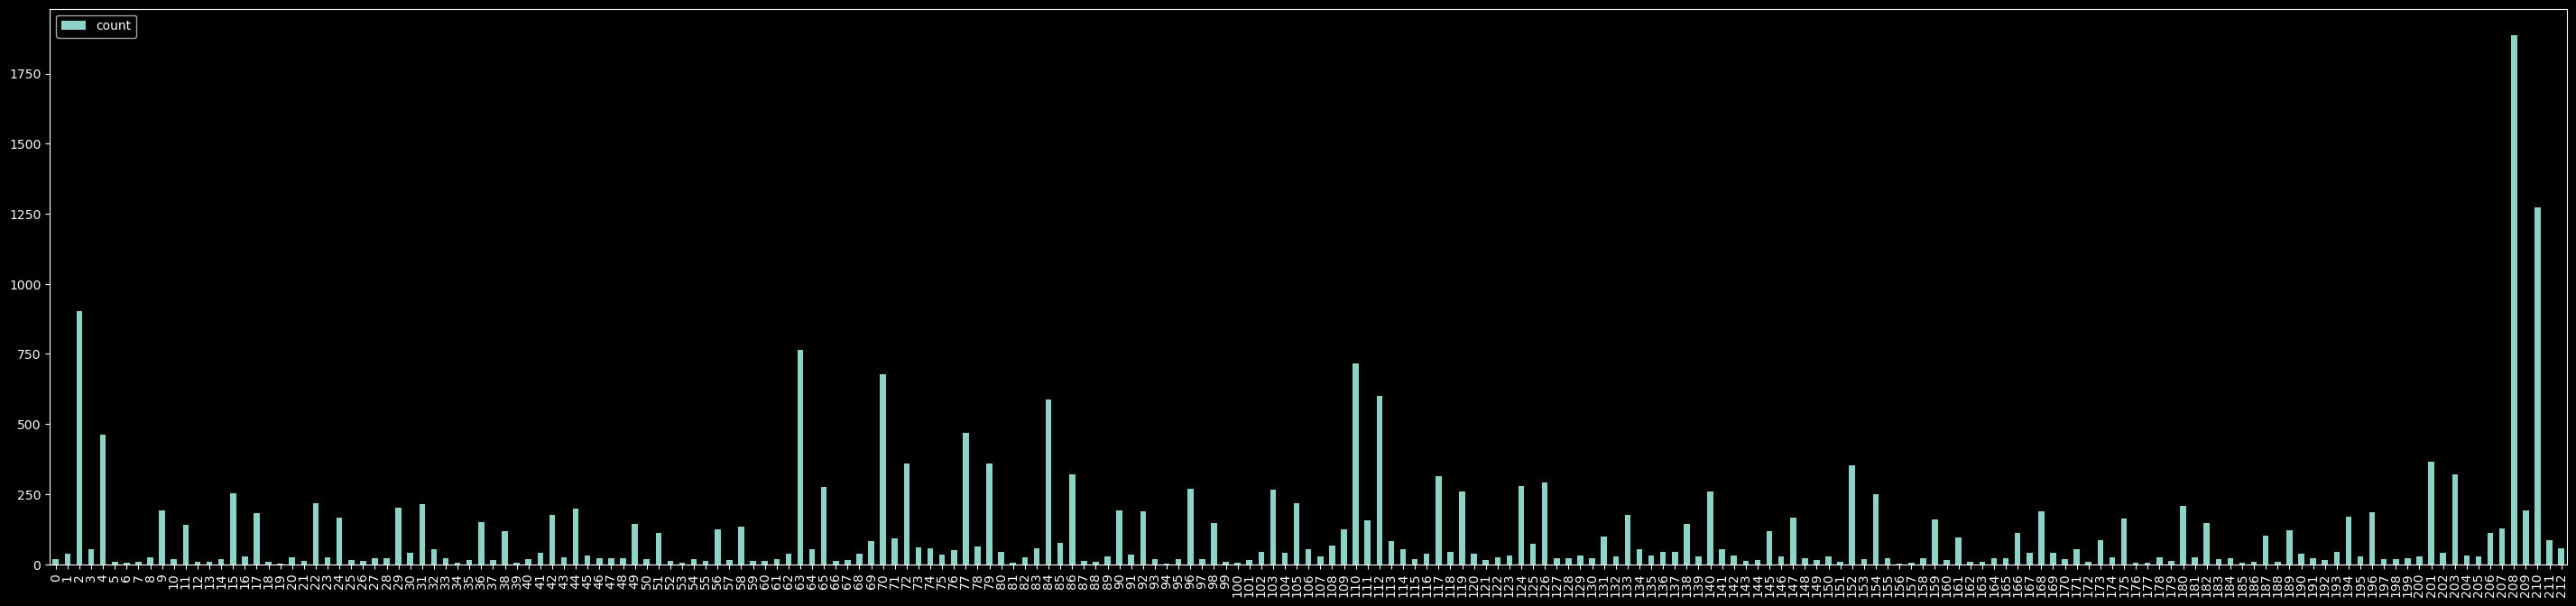

In [43]:
df3.plot(kind='bar', figsize=(36,8))

### No. of Votes, Location Wise

In [44]:
df4 = df[['location', 'votes']]

# Remove duplicates
df4 = df4.drop_duplicates()

# Group by 'location' and sum the 'votes'
df5 = df4.groupby(['location'])['votes'].sum()

# Convert the Series to a DataFrame
df5 = df5.to_frame()

# Sort the DataFrame by 'votes' in descending order
df5 = df5.sort_values('votes', ascending=False)

# Display the top rows
df5.head()

,votes
location,
Koramangala 5th Block,1062493
Indiranagar,647947
others,419502
Church Street,291376
Koramangala 4th Block,281446


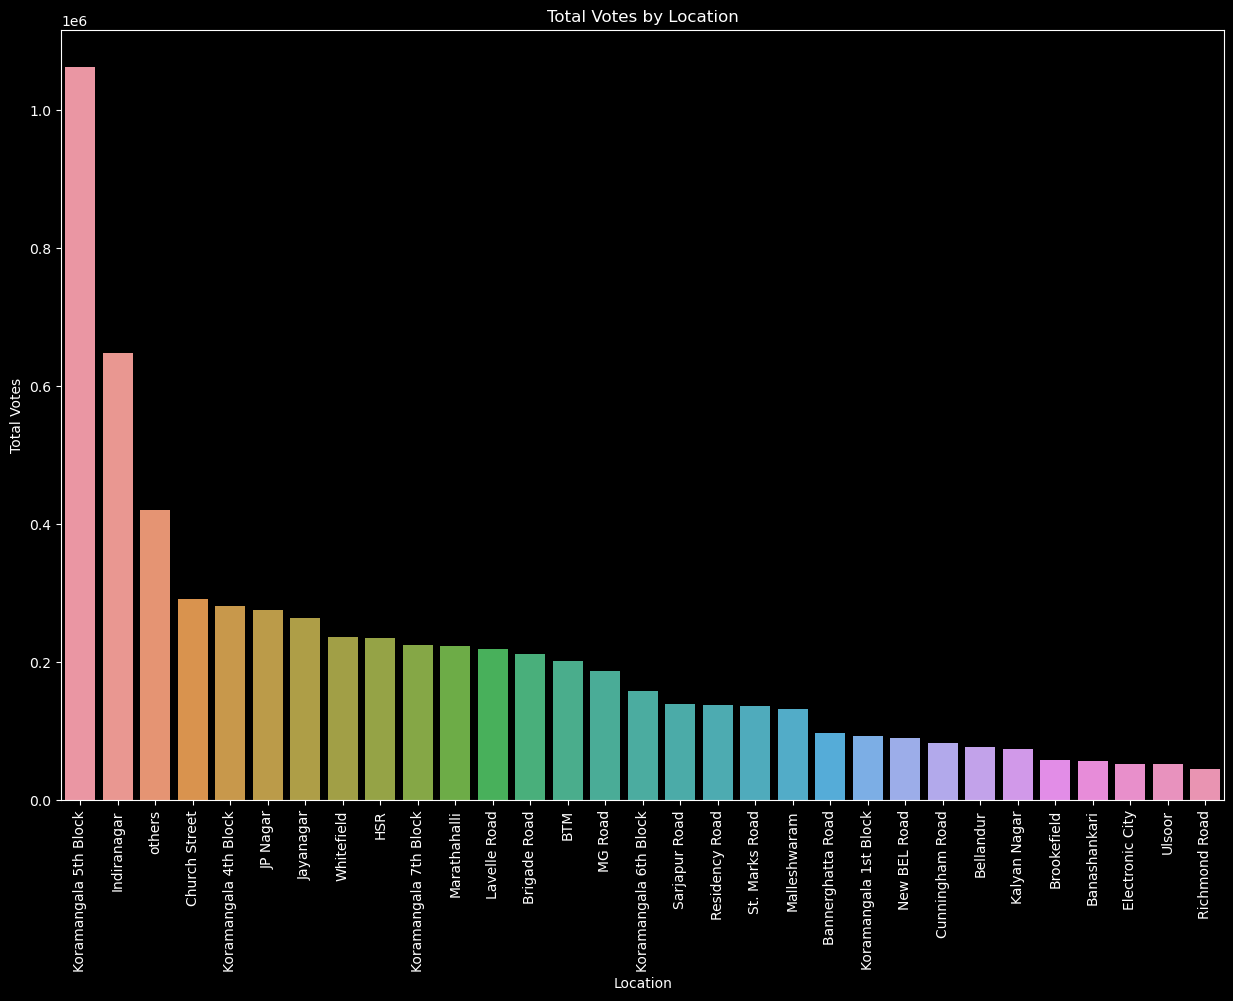

In [45]:
plt.figure(figsize=(15,10))
sns.barplot(x=df5.index, y=df5['votes'])
plt.xticks(rotation=90)
plt.xlabel('Location')
plt.ylabel('Total Votes')
plt.title('Total Votes by Location')
plt.show()

In [46]:
df5.head()

,votes
location,
Koramangala 5th Block,1062493
Indiranagar,647947
others,419502
Church Street,291376
Koramangala 4th Block,281446


### Visualizing Top Cuisines

In [47]:
df6 =df[['cuisines','votes']]
df6.drop_duplicates()
df7=df6.groupby(['cuisines'])['votes'].sum()
df7 = df7.to_frame()
df7=df7.sort_values('votes',ascending=False)
df7.head()

,votes
cuisines,
others,12111844
North Indian,494635
"North Indian, Chinese",222514
South Indian,144467
"North Indian, Mughlai",102581


In [48]:
df7 = df7.iloc[1:,:]
df7.head()

,votes
cuisines,
North Indian,494635
"North Indian, Chinese",222514
South Indian,144467
"North Indian, Mughlai",102581
Chinese,98508


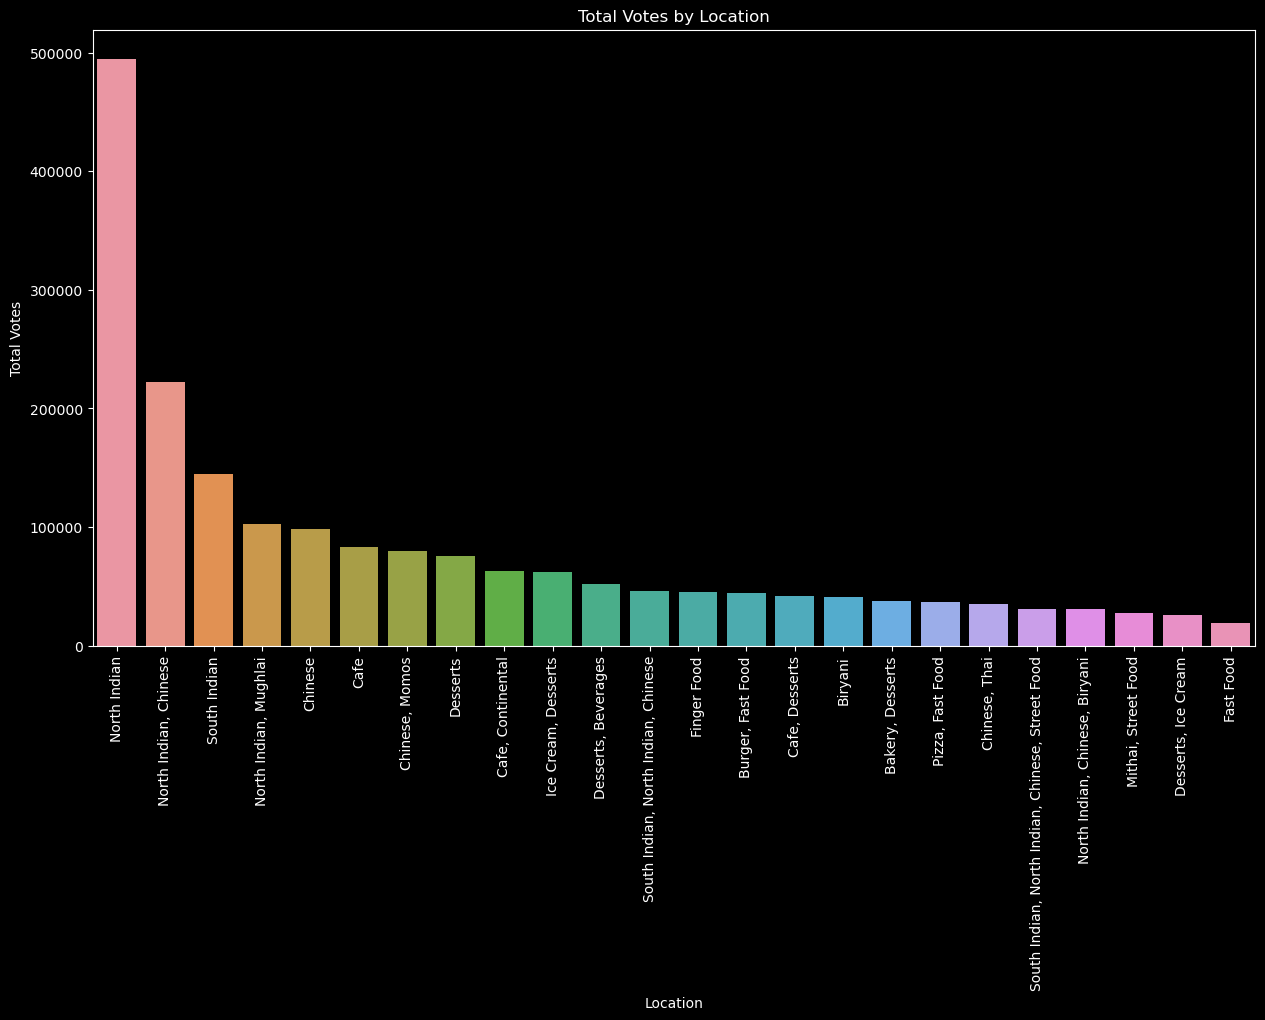

In [49]:
plt.figure(figsize=(15,8))
sns.barplot(x=df7.index, y=df7['votes'])
plt.xticks(rotation=90)
plt.xlabel('Location')
plt.ylabel('Total Votes')
plt.title('Total Votes by Location')
plt.show()